 # Lecture8 : Posterior Inference & Prediction
 
 ## Instructor: Dr. Hu Chuan-Peng 

**使用后验分布进行统计推断**

▶我们对贝叶斯分析中的概念、基本流程都已经有了大致的了解。我们知道通过结合先验与似然来得到后验，但更具体的后验能告诉我们什么呢？

⭐这节课我们关注怎么利用后验分布进行统计推断，包括：
> * 后验估计
> * 假设检验
> * 后验预测

我们主要使用一个睡眠情况调查的例子来介绍这三部分内容
![imageName](https://webstockreview.net/images/clipart-sleeping-clip-art-child-2.png)


**睡眠状况调查**

假设我们想知道大学生11点前入睡的可能性是多少，我们把这一可能性记为$\pi$，并就这一问题开展了调查。

> 我们可以试着使用贝叶斯分析来回答这个问题

1. 首先，我们需要确立先验。在开始调查之前，我们对这个入睡可能性有着某种信念，假设我们认为$\pi$服从
$$
\pi  \sim \text{Beta}(4, 6) 
$$

2. 接下来我们开始收集数据，假设对**100**位大学生展开调查，其中有**14**个人回答他们在11点前入睡

    * 我们的数据可以用二项分布来描述
$$
Y | \pi  \sim \text{Bin}(100, \pi)
$$

> 这是我们熟悉的Beta-Binomial模型：
>$$\pi \sim \text{Beta}(\alpha, \beta)$$
>$$Y | \pi  \sim \text{Bin}(n, \pi) $$
>$$ \pi | (Y = y) \sim \text{Beta}(\alpha + y, \beta + n - y)$$


3. 最后，后验可以写成：
$$
\pi | (Y = 14) \sim Beta(18, 92)
$$

--------------

**在贝叶斯的框架下，我们可以把后验分布看作是对$\pi$的一种估计，即当前数据更可能在哪一种$\pi$下出现。**

> 🤔当你看到这个后验分布时，你觉得它描述了关于$\pi$怎样的一种信息呢？
> * a. 在11点前入睡的学生比例大概是16%
> * b. 在11点前入睡的学生比例最有可能是16%，但这个比例也可能是9%到26%中的某一个。

![imageName](https://www.bayesrulesbook.com/bookdown_files/figure-html/art-post-ch8-1.png)

## Posterior estimation

> b是更符合贝叶斯取向的回答，为什么这么说呢 ➡

* 我们来考虑另一种调查情况下得出的后验分布：

* 我们对$\pi$的先验仍然为$\pi \sim Beta(4, 6)$，但我们只调查了10位学生，在他们之中，回答自己在11点前入睡的人数为0

$$\pi \sim Beta(4, 6)$$
$$Y | \pi  \sim \text{Bin}(100, \pi)$$
$$\pi | (y = 0) \sim \text{Beta}(\alpha + y, \beta + n - y)$$

* 这种情况下，$\pi$的后验分布满足$\pi | (Y = 0) \sim Beta(4, 16)$

下图展示了这两种情况下的后验分布

> 黑线表示众数，即在后验分布中最可能出现的值

![Image Name](https://cdn.kesci.com/upload/s366vtdj8a.png?imageView2/0/w/960/h/960)

* 在这两种分布下，$\pi$最可能的取值都在16-17%左右

* 如果只关注众数，两种截然不同的情况却会导致相似的结论❌

* 但很明显，我们可以看到两图中$\pi$的分布范围是不同的


⭐**为了同时了解$\pi$的集中趋势和离散趋势，我们可以使用 *95%的可信区间* 来描述$\pi$**

### 可信区间(credible interval)

* 后验分布的2.5%百分位数和97.5%百分位数包含的区域共同组成了95%的后验可信区间

* 可信区间表示了参数出现在这个区域的概率
    * 比如，Beta(18,92) 95%的可信区间为(0.1,0.24)，则我们可以说，大学生在11点前入睡的可能性落在(0.1,0.24)的可能性是95%

![Image Name](https://cdn.kesci.com/upload/s3676yx2sr.png?imageView2/0/w/960/h/960)



* 在创建可信区间时，95%是最常见的选项，但并不是唯一的选项，仍以Beta(18,92)为例，我们也可以创建其他可信区间，比如：
    * 50% 可信区间：由25%百分位数和75%百分位数包含的区域
    * 99%可信区间：由0.5%百分位数和99.5%百分位数包含的区域

![Image Name](https://cdn.kesci.com/upload/s36j8gacj.png?imageView2/0/w/960/h/960)

> 在95%CI的图中，由于后验分布是一个偏态分布，可以看到相较于前半部分，后半部分包含的值对应的概率更低。
> 当后验分布是偏态分布时，有时我们不以中位数为中心构建95%的可信区间，而是基于最高后验概率密度(众数)。

------

**最大后验概率密度区间(the highest density interval, HDI)**

直觉理解：想象有一根水平的线从后验概率密度最高点往下滑，如果是95%HDI，则意味着黄色部分的面积占曲线下面积的95%

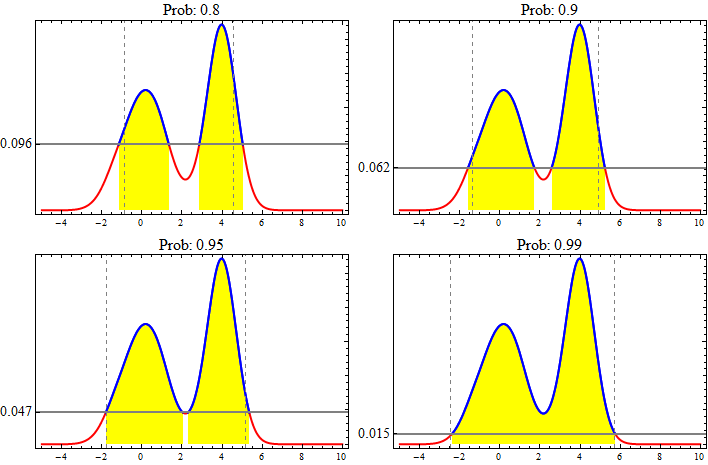


> 将95%CI 与 95%HDI 进行比较：

![Image Name](https://cdn.kesci.com/upload/s36vflrg1f.png?imageView2/0/w/960/h/960) 

## Posterior hypothesis testing

>🤔假设我们在一篇报道中看到这样一种描述：在11点入睡的大学生少于20%
> 根据这个结论，我们可以对后验分布做出怎样的假设？

比如，我们可以认为，在后验分布$Beta(18,92)$中，绝大多数$\pi$的取值都小于0.2

* 那么，我们可以考虑在后验分布$Beta(18,92)$中，$\pi$小于0.2的概率
$$
P(\pi < 0.2 \; | \; Y = 14) = \int_{0}^{0.2}f(\pi | y=14)d\pi .
$$
(如图，可以理解为$\pi$从0~0.2围成的曲线下面积)

![Image Name](https://cdn.kesci.com/upload/s36xa3xxpj.png?imageView2/0/w/960/h/960)

经计算可知，在$Beta(18, 92)$中，$\pi$小于0.2的概率是89.4%

### 假设检验

如果我们把这个问题放到假设检验的框架下，那么这个问题可以写成：

* 虚无假设：在11点前入睡的大学生比例大于等于20%

* 备择假设：在11点前入睡的大学生比例小于20%


$$
\begin{split}
H_0: & \; \; \pi \ge 0.2 \\
H_a: & \; \; \pi < 0.2 \\
\end{split}
$$

> 注意：这是一个单侧检验

我们可以计算出这两个假设对应的后验概率：

* 备择假设：$\pi < 0.2$
$$P(H_a \; | \; Y=14) = 0.849$$

* 虚无假设：$\pi \ge 0.2$
$$P(H_0 \; | \; Y=14) = 1-P(H_a \; | \; Y=14) = 0.151$$

将这二者相除，我们可以知道备择假设发生的可能性大约是虚无假设的6倍，这被称为**后验概率比(posterior odds)**

$$
\text{posterior odds } = \frac{P(H_a \; | \; Y=14)}{P(H_0 \; | \; Y=14)} \approx 5.62.
$$

------

我们说$\pi$的后验概率体现了对$\pi$的信念更新，那么我们可以看一下在**先验分布**中，虚无假设和备择假设发生的可能性

* 备择假设：$\pi < 0.2$
$$
P(H_a) = \int_0^{0.2} f(\pi) d\pi \approx 0.0856 
$$

* 虚无假设：$\pi \ge 0.2$
$$
P(H_0) = 1-P(H_a) \approx 0.914
$$

* 先验概率比：
$$
\text{Prior odds } = \frac{P(H_a)}{P(H_0)} \approx 0.093 
$$


### 贝叶斯因子(Bayes Factor, BF)

> $$\text{posterior odds } \approx 5.62$$
> $$\text{Prior odds } \approx 0.093 $$

从先验到后验，备择假设发生的相对可能性发生了改变。

更进一步地，我们可以使用**贝叶斯因子**来比较后验概率比和先验概率比

$$
\text{Bayes Factor} = \frac{\text{posterior odds }}{\text{prior odds }} = \frac{\text{后验概率比}}{\text{先验概率比}}
$$

代入我们的数据中
$$
\text{Bayes Factor} = \frac{5.62}{0.093} \approx 60
$$

* 在这个例子中，贝叶斯因子大约是60，表明备择假设在后验分布出现的可能性大于在先验分布出现的可能性

-----------

我们对贝叶斯因子进行一个总结：

$$
\text{Bayes Factor}
= \frac{\text{posterior odds}}{\text{prior odds}}
= \frac{P(H_a | Y) / P(H_0 | Y)}{P(H_a) / P(H_0)}
$$

* BF=1，收集到的数据并没有改变备择假设$H_a$的相对可能性
* BF>1，收集到的数据增加了备择假设$H_a$的相对可能性。BF越大，表明支持备择假设$H_a$的证据越强
* BF<1，收集到的数据削弱了备择假设$H_a$的相对可能性。BF越小，表明支持备择假设$H_a$的证据越弱

综上，后验概率(0.85)和贝叶斯因子(60)为备择假设提供了相当可信(fairly convincing)的证据。

* 这区分于我们曾经在频率主义框架下所做的那样：根据p值的大小拒绝或接受假设。

* 在贝叶斯学派中，并没有一个类似的一刀切标准，可以告诉我们后验概率或贝叶斯因子要达到什么标准才能将一个假设判断为真或假。它只是衡量不同的假设发生的相对可能性。


**双侧检验**

* 除了单侧检验，有时我们的问题需要用双侧检验来回答。

* 比如，或许我们想知道 11点前入睡的大学生比例是否为30%，此时备择假设和虚无假设可以写成：
$$
\begin{split}
H_0: & \; \; \pi = 0.3 \\
H_a: & \; \; \pi \ne 0.3 \\
\end{split}
$$

* 但此时我们会遇到一个问题，因为$\pi$的后验分布是连续的，我们知道对于连续型变量，单个值发生的概率为0(一条线)：
$$
P(\pi = 0.3 | Y = 14) = \int_{0.3}^{0.3} f(\pi | y = 14)d\pi = 0
$$

* 那么备择假设发生的概率为：
$$
P(\pi \ne 0.3 | Y = 14) = 1 - P(\pi = 0.3 | Y = 14) = 1
$$

* 此时如果我们仍然沿用刚刚的公式计算后验概率比：
$$
\text{Posterior odds } = \frac{P(H_a \; | \; Y=14)}{P(H_0 \; | \; Y=14)} = \frac{1}{0} = \text{ nooooo!}
$$

* 既然在连续型变量中，考虑单个值的概率会遇到计算上的问题，我们可以引入**区间**，比如11点前入睡的大学生比例$\pi$是否在(0.25,0.35)这个区间内：

$$
\begin{split}
H_0: & \; \; \pi \in (0.25, 0.35) \\
H_a: & \; \; \pi \notin (0.25, 0.35) \\
\end{split}
$$

> 注：区间的选择需要结合可信区间来决定

*具体的计算步骤和单侧检验情况下一样，在这里不再展开*

## Posterior prediction

### 后验预测分布中的变异

* 在得到后验分布后，除了后验估计、假设检验之外，常见的统计推断还有后验预测。

> 比如，我们又继续调查了20人的数据。根据当前后验得出的对$\pi$的估计，我们希望回答，在这新的20人中，11点之前入睡的人数是多少？

* 但需要注意，在使用后验分布进行预测时，存在着两种变异：

1. 参数变异(**Posterior variability** in π)

    * 后验分布直观地体现了这一变异，它表现了不同π取值的相对可能性。

        * 比如在后验分布$Beta(18,92)中，π最可能的取值大约是0.16，但0.16并不是唯一的可能取值

2. 采样变异(**Sampling variability** in the data)

    * 样本的抽取具有随机性

> 我们用公式来具体说明采样变异性：

* 在新数据中，我们把可能出现的结果写为$Y' = y'$，$y'$可以为$\{0,1,...,20\}$中的任意一个数

* 在任意$\pi$下，某种结果$y'$出现的可能性可以表示为:

$$
f(y'|\pi) = P(Y' = y' | \pi) = \binom{20}{ y'} \pi^{y'}(1-\pi)^{20 - y'}
$$

* 随意选取三种不同的$\pi$，画出每一种结果的可能性

![Image Name](https://cdn.kesci.com/upload/s36z989r7y.png?imageView2/0/w/960/h/960)

* 在每一个给定的$\pi$下，都有不同的结果可能发生，反映了抽样过程中存在的变异性
    * 比如，当$\pi=0.16$时，在当前样本中，最有可能出现的结果是有4人回答自己在11点前入睡，但由于抽样变异性，也有可能回答自己在11点前入睡的人数为0。

### 后验预测分布

在当前例子下，我们感兴趣的是特定$y'$发生的可能性，那么我们既要考虑到给定$\pi$下$y'$的变异性，也要考虑到$\pi$取值的变异性:
$$
f(y'|\pi) f(\pi|y=14)  
\tag{1}
$$

* 遍历所有的$\pi$，计算公式(1)的总和并进行平均，我们就可以获得$Y' = y'$发生的整体概率，得到了$Y'$的后验预测模型(**posterior predictive model **)

$$
f(y'|y=14) = P(Y'=y' \; | \; Y=y) = \int_0^1 f(y'|\pi) f(\pi|y=14) d\pi 
$$

* 有了后验预测模型之后，我们回到最开始的问题，比如我们想知道，在这20人中，有$\ge 5$人给出肯定回答的概率是多少？

    * 我们可以进行如下计算：

$$
\begin{split}
P(Y' \ge 5 | y = 14) 
& = \sum_{y' = 5}^{20} f(y' | y = 14) \\
& = f(y' = 5 | y = 14) + f(y' = 6 | y = 14) + \cdots + f(y' = 20 | y = 14)\\
& = 0.233. \\
\end{split}
$$

* 我们也可以计算后验预测分布的期望值：将$\pi$与对应的后验预测值相乘并加和：

$$
\begin{split}
E(Y' | y = 14) 
& = \sum_{y' = 0}^{20} y' f(y' | y = 14) \\
& = 0\cdot f(y' = 0 | y = 14) + 1 \cdot f(y' = 1 | y = 14) + \cdots + 20\cdot f(y' = 20 | y = 14)\\
& = 3.273. \\
\end{split}
$$

**代码练习**

后验预测分布如图所示，我们尝试使用代码来生成这一后验预测分布

![Image Name](https://cdn.kesci.com/upload/s36z9nlnbb.png?imageView2/0/w/960/h/960)

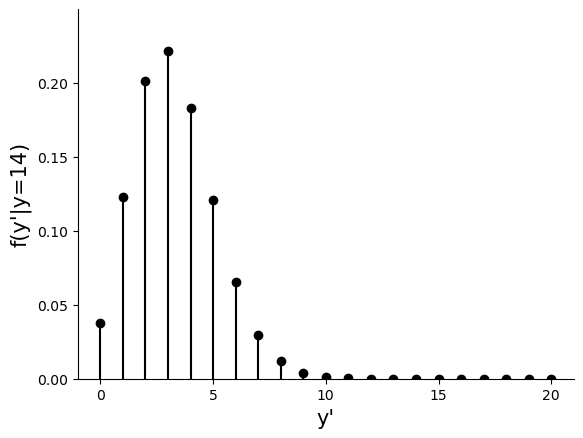

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

#===========================================================================
#                            请修改...中的值
#===========================================================================

pi = np.linspace(0,1,101)                   #在0-1之间生成101个pi值
y_num = np.linspace(0,20,21)                #在0-20之间生成21种可能出现的结果
pp_list = []                                #创建一个空的列表，用来存储每一个pi下，不同y出现的可能性

for i in pi:                                #遍历pi
    posterior = st.beta.pdf(i,18,92)        #计算每一个pi对应的后验分布概率值
    likelihood = st.binom.pmf(y_num,20,i)   #计算每一个pi下，不同y出现的可能性，一共有20个值
    pos_predict = ...*...                   #计算两者乘积
    pp_list.append(pos_predict)             #存入空列表中

pp_list = np.array(pp_list)                 #转换为numpy数组

pp_sum = np.sum(...,axis=0)                 #对所有pi下，不同y出现的可能性进行求和，axis=0表示按行对每一列进行求和
                                            #可以理解为：每个pi为一行，每一种可能的结果y'为一列
pp_sum /= np.sum(pp_sum)                    #平均

#===========================================================================
#                            绘图代码
#===========================================================================
plt.stem(y_num,pp_sum,                      #横轴为可能的结果，纵轴为结果对应的可能性
         linefmt='black',
         bottom=-1)

plt.xlabel("y'",fontsize=15)
plt.xticks(np.arange(0, 21,5))
plt.ylabel("f(y'|y=14)",
           fontsize=15)
plt.ylim(0, 0.25)
plt.yticks(np.arange(0, 0.21,0.05))
sns.despine()